# Bitcoin Price Analysis (Regression)

## Summary

This notebook performs an exploratory data analysis (EDA) on Bitcoin (BTC/USDT) price data. The goal is to understand the data's structure, identify patterns, and prepare it for a regression-based trading model.

### Steps:
1.  **Data Loading and Inspection:** Load the dataset and examine its basic properties.
2.  **Time Coverage and Frequency Analysis:** Check the time range and resolution of the data.
3.  **Data Cleaning:** Handle any missing values or inconsistencies.
4.  **Visualization:** Create various plots to visualize price trends, volume, and other features.
5.  **Feature Exploration:** Analyze the relationships between different variables to inform the regression model.

### Step 1 – Load and get a first feel of the data (inspection)

In [2]:
import pandas as pd

df = pd.read_csv("archive/BYBIT_BTCUSDT_15m.csv", parse_dates=["Datetime"])
df = df.sort_values("Datetime").set_index("Datetime")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Turnover
Datetime,,,,,,
2020-03-25 16:00:00,6500.0,6500.0,6500.0,6500.0,0.002,13.0000
2020-03-25 16:15:00,6500.0,6591.5,6500.0,6591.5,0.002,13.1830
2020-03-25 16:30:00,6591.5,6622.5,6585.5,6590.5,37.803,249140.6715
2020-03-25 16:45:00,6590.5,6628.5,6588.5,6618.0,141.338,935374.8840
2020-03-25 17:00:00,6618.0,6618.0,6457.5,6499.5,120.703,784509.1485


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204389 entries, 2020-03-25 16:00:00 to 2026-01-22 17:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Open      204389 non-null  float64
 1   High      204389 non-null  float64
 2   Low       204389 non-null  float64
 3   Close     204389 non-null  float64
 4   Volume    204389 non-null  float64
 5   Turnover  204389 non-null  float64
dtypes: float64(6)
memory usage: 10.9 MB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Turnover
count,204389.000000,204389.000000,204389.000000,204389.000000,204389.000000,2.043890e+05
mean,49140.251043,49232.331382,49045.766178,49140.659974,980.215074,4.805807e+07
std,31184.061034,31228.325878,31138.714127,31184.048958,1743.545449,8.766854e+07
min,5873.000000,5897.000000,5841.500000,5873.000000,0.000000,0.000000e+00
25%,23885.000000,23939.300000,23828.800000,23885.000000,226.913000,9.161888e+06
50%,41867.000000,41944.500000,41784.500000,41867.500000,494.993000,2.262921e+07
75%,66578.900000,66700.000000,66460.000000,66579.200000,1059.282000,5.250901e+07
max,125981.300000,126150.000000,125565.800000,125981.300000,86368.508000,5.524256e+09


### Step 2 – Check time coverage and frequency

In [6]:
df.index.min(), df.index.max(), df.shape[0]

# Check expected 15-min grid
full_index = pd.date_range(df.index.min(), df.index.max(), freq="15min")
missing = full_index.difference(df.index)
print("Missing bars:", len(missing))

Missing bars: 0


In [7]:
dups = df.index.duplicated().sum()
print("Duplicate timestamps:", dups)

Duplicate timestamps: 0


### Step 3 – Basic data profiling per variable

In [8]:
# Per-column summary
summary = df.describe().T
summary["missing"] = df.isna().sum()
summary["missing_pct"] = summary["missing"] / len(df)
summary

,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
Open,204389.0,4.914025e+04,3.118406e+04,5873.0,2.388500e+04,4.186700e+04,6.657890e+04,1.259813e+05,0,0.0
High,204389.0,4.923233e+04,3.122833e+04,5897.0,2.393930e+04,4.194450e+04,6.670000e+04,1.261500e+05,0,0.0
Low,204389.0,4.904577e+04,3.113871e+04,5841.5,2.382880e+04,4.178450e+04,6.646000e+04,1.255658e+05,0,0.0
Close,204389.0,4.914066e+04,3.118405e+04,5873.0,2.388500e+04,4.186750e+04,6.657920e+04,1.259813e+05,0,0.0
Volume,204389.0,9.802151e+02,1.743545e+03,0.0,2.269130e+02,4.949930e+02,1.059282e+03,8.636851e+04,0,0.0
Turnover,204389.0,4.805807e+07,8.766854e+07,0.0,9.161888e+06,2.262921e+07,5.250901e+07,5.524256e+09,0,0.0


### Step 4 – Visualize each variable over time (univariate time plots)

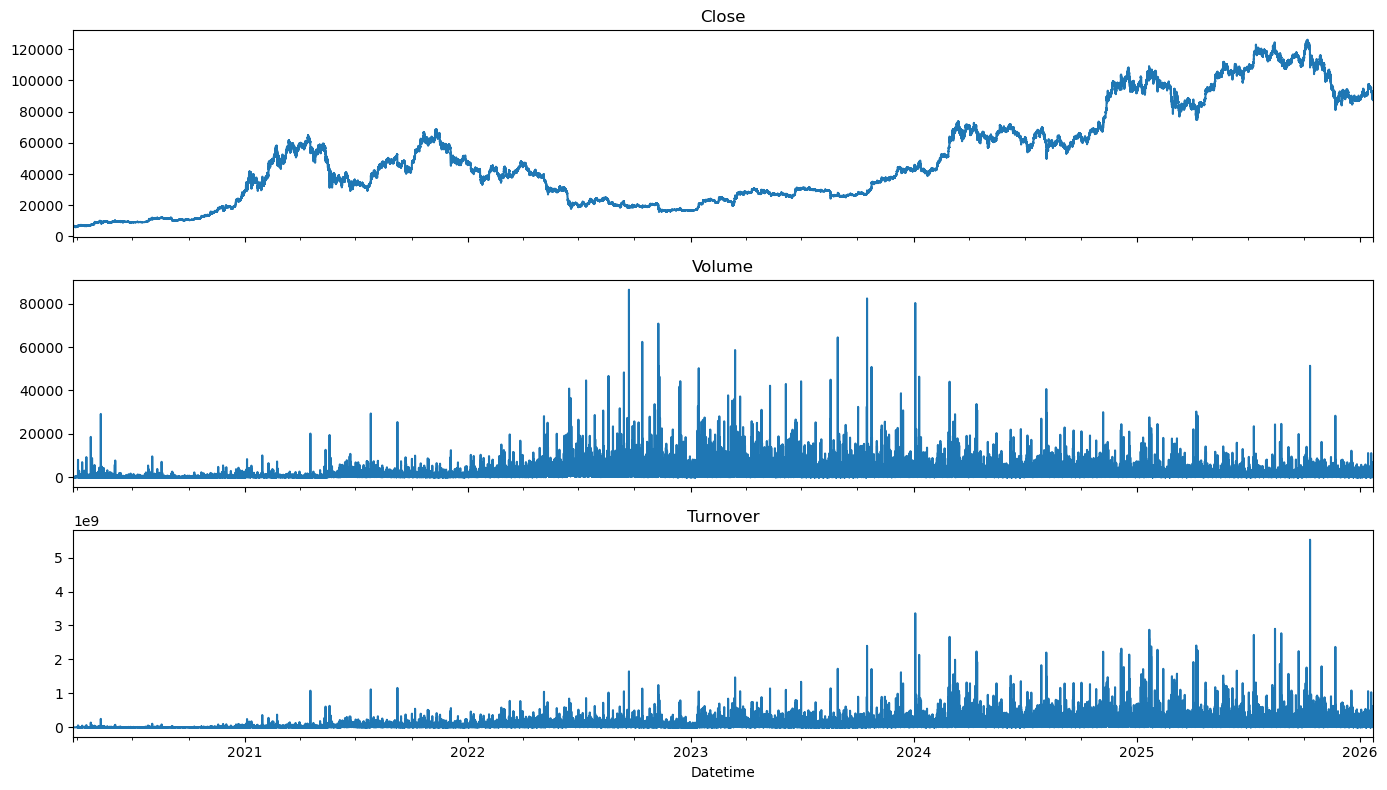

In [9]:
import matplotlib.pyplot as plt

cols_to_plot = ["Close", "Volume", "Turnover"]

fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(14, 8), sharex=True)
for ax, col in zip(axes, cols_to_plot):
    df[col].plot(ax=ax)
    ax.set_title(col)
plt.tight_layout()


### Step 5 – Check distributions and outliers per variable

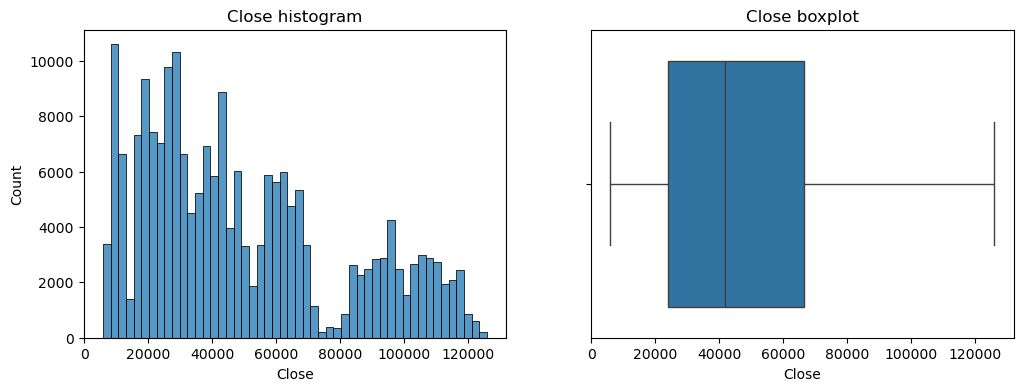

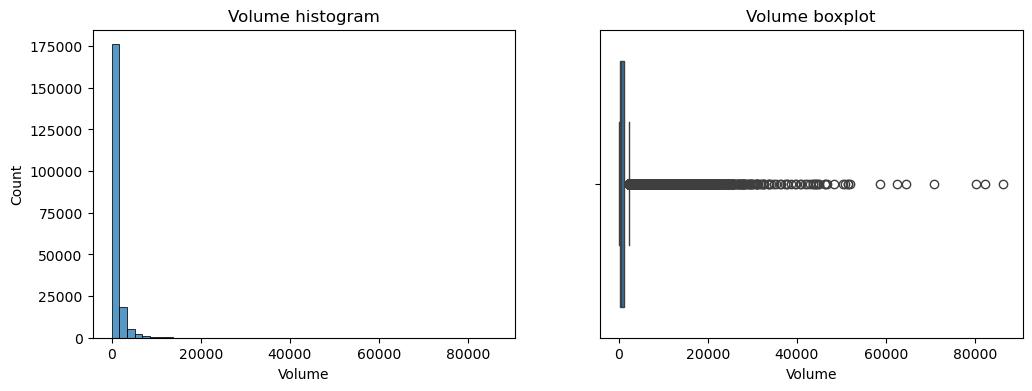

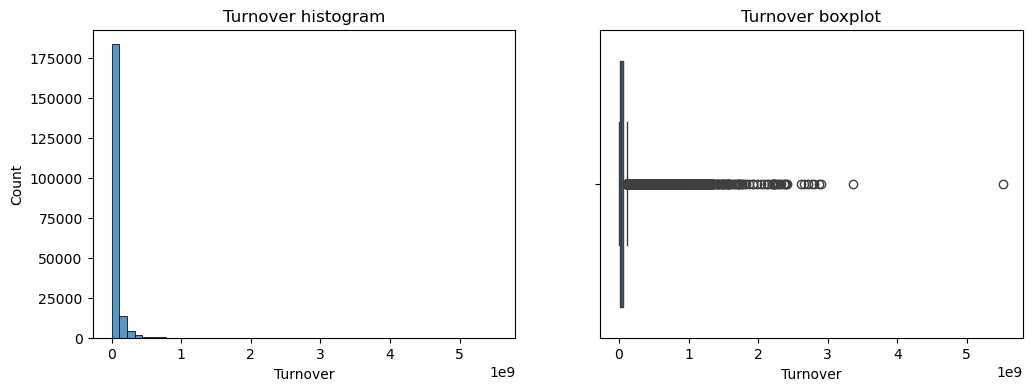

In [10]:
import seaborn as sns

for col in ["Close", "Volume", "Turnover"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), bins=50, ax=axes[0])
    axes[0].set_title(f"{col} histogram")

    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"{col} boxplot")
    plt.show()

### Step 6 – Missing data pattern analysis

<Axes: xlabel='Datetime'>

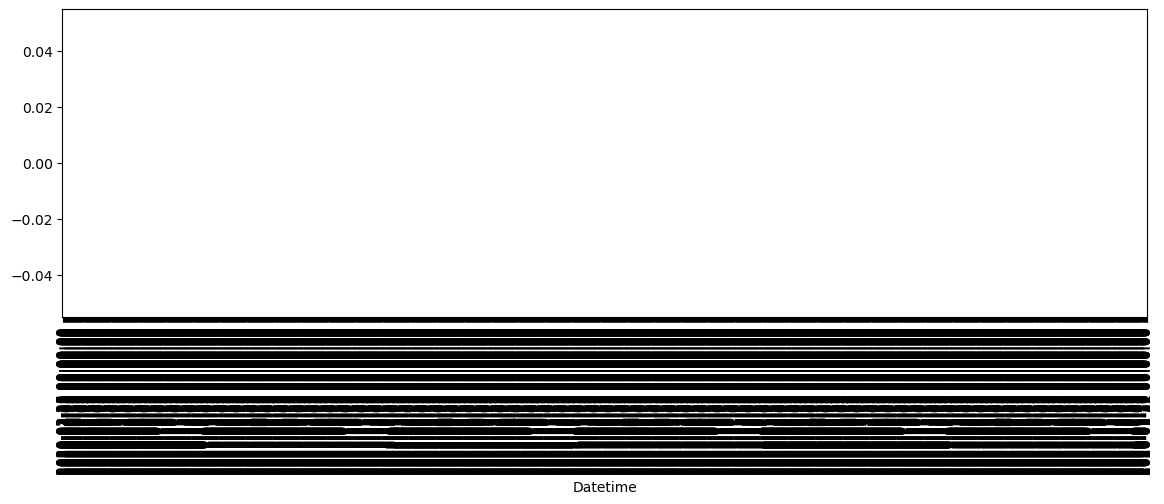

In [11]:
# Overall missing per column
df.isna().sum()

# Missing over time (e.g., for Close)
missing_close = df["Close"].isna().astype(int)
missing_close.resample("1D").sum().plot(kind="bar", figsize=(14, 4))

### Step 7 – Correlations and cross‑relationships (multivariate profiling)

#### 7.1 Correlation matrix

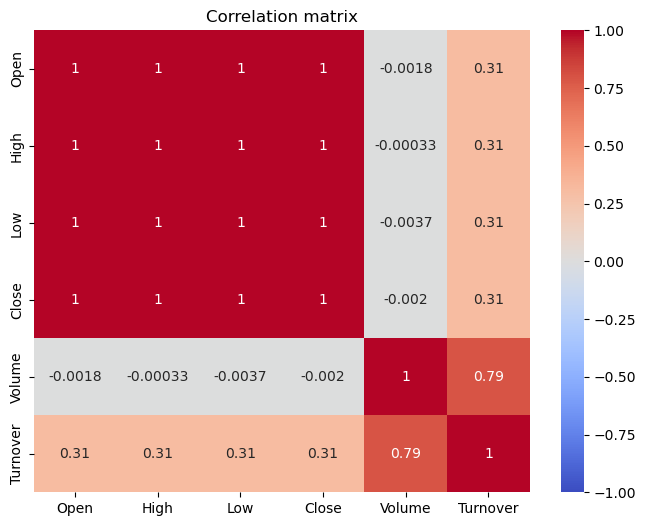

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Open", "High", "Low", "Close", "Volume", "Turnover"]

corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

#### 7.2 Scatter plots for key pairs

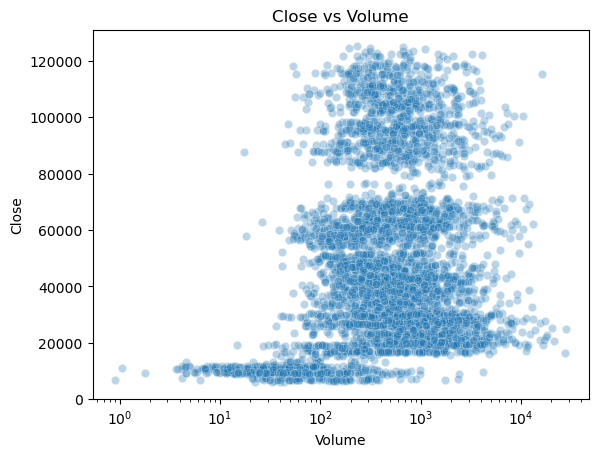

In [13]:
sns.scatterplot(data=df.sample(5000), x="Volume", y="Close", alpha=0.3)
plt.xscale("log")  # volume is often heavy-tailed
plt.title("Close vs Volume")
plt.show()

### Step 8 – Time‑series‑specific structure: trend, seasonality, volatility

#### 8.1 Rolling statistics

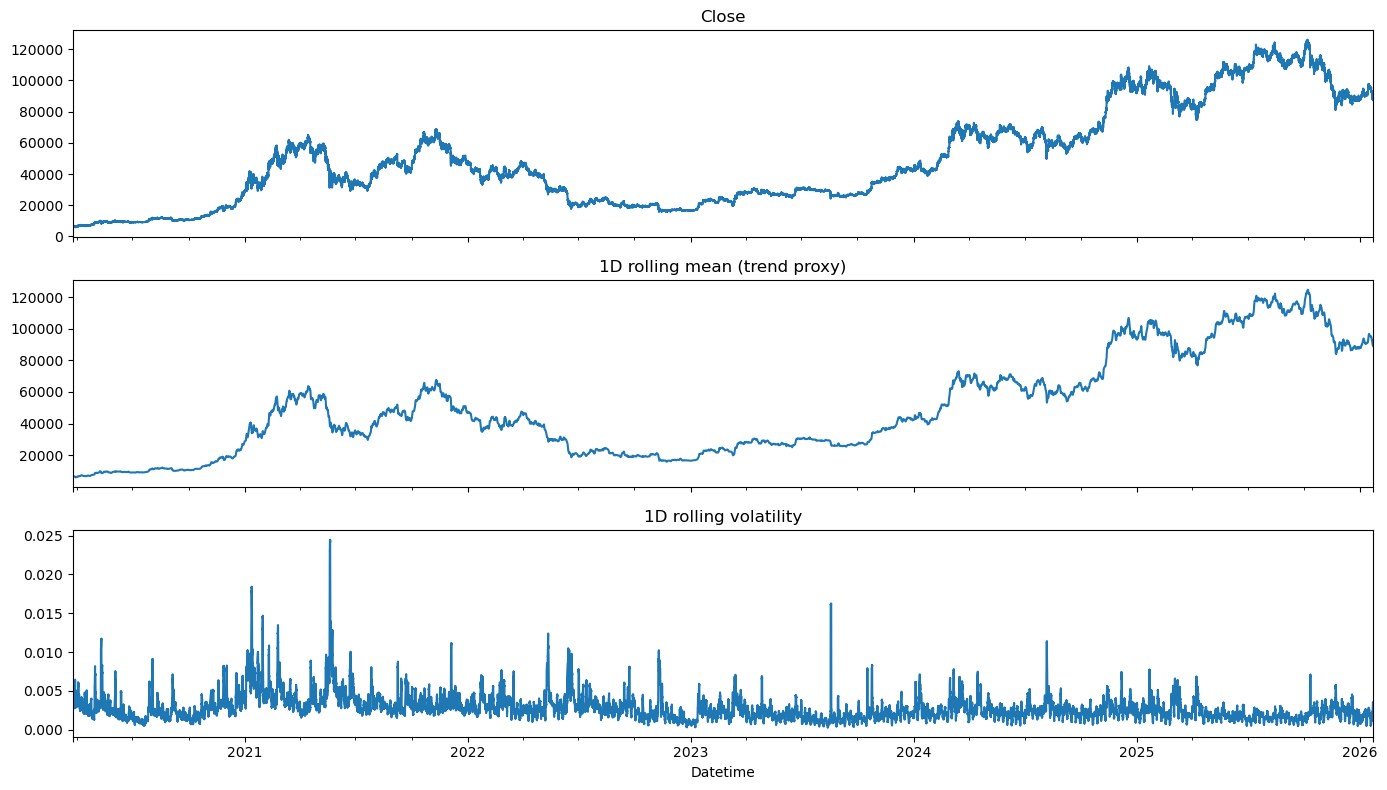

In [15]:
import numpy as np

df["log_close"] = np.log(df["Close"])
df["ret_1"] = df["log_close"].diff()

df["roll_mean_1d"] = df["Close"].rolling(96).mean()  # 96*15m = 1 day
df["roll_std_1d"] = df["ret_1"].rolling(96).std()

fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
df["Close"].plot(ax=axes[0], title="Close")
df["roll_mean_1d"].plot(ax=axes[1], title="1D rolling mean (trend proxy)")
df["roll_std_1d"].plot(ax=axes[2], title="1D rolling volatility")
plt.tight_layout()

#### 8.2 Intraday / weekly patterns (seasonality)

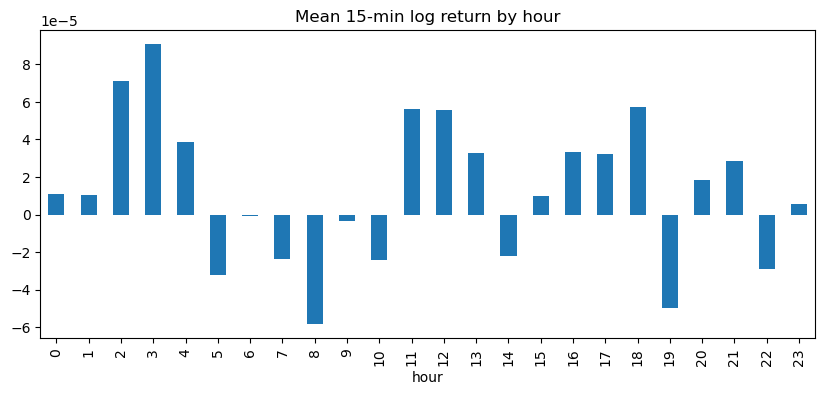

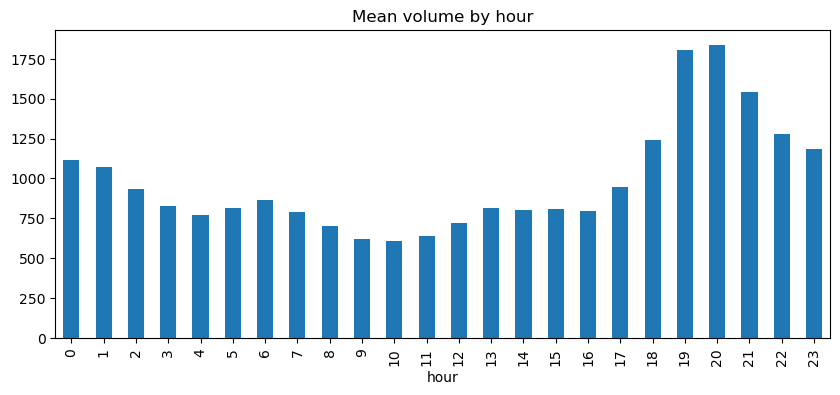

In [16]:
df["hour"] = df.index.hour
df["weekday"] = df.index.dayofweek

# Average 15-min return by hour of day
hourly_ret = df.groupby("hour")["ret_1"].mean()
hourly_ret.plot(kind="bar", figsize=(10, 4), title="Mean 15-min log return by hour")
plt.show()

# Average volume by hour
hourly_vol = df.groupby("hour")["Volume"].mean()
hourly_vol.plot(kind="bar", figsize=(10, 4), title="Mean volume by hour")
plt.show()

### Step 9 – Outlier detection (time‑aware)

In [17]:
# Rolling z-score on returns and volume
win = 96  # 1 day
ret_mean = df["ret_1"].rolling(win).mean()
ret_std = df["ret_1"].rolling(win).std()
df["ret_z"] = (df["ret_1"] - ret_mean) / ret_std

vol_mean = df["Volume"].rolling(win).mean()
vol_std = df["Volume"].rolling(win).std()
df["vol_z"] = (df["Volume"] - vol_mean) / vol_std

# Flag extreme events
outliers = df[(df["ret_z"].abs() > 5) | (df["vol_z"].abs() > 5)]
outliers[["Close", "Volume", "ret_1", "ret_z", "vol_z"]].head()

,Close,Volume,ret_1,ret_z,vol_z
Datetime,,,,,
2020-03-26 23:00:00,6627.5,238.153,0.000075,0.039906,6.579112
2020-03-28 05:00:00,6353.5,129.427,-0.041694,-8.111280,3.877075
2020-03-28 23:45:00,6205.5,406.610,0.010937,1.827922,7.482868
2020-03-30 01:00:00,5909.0,426.501,-0.024243,-6.356440,7.295511
2020-03-30 10:30:00,6187.0,438.547,0.026782,5.501841,5.053338


### Step 10 – Summarize findings and define cleaning actions

Based on the EDA from steps 1-9, here's a summary of the data characteristics and a proposed cleaning plan.

#### Data Quality
*   **Missing bars**: The time index is complete with no missing 15-minute bars.
*   **Duplicates**: There are no duplicate timestamps.
*   **NaNs**:
    *   The raw data (`Open`, `High`, `Low`, `Close`, `Volume`, `Turnover`) appears to be complete based on the initial check (`df.isna().sum()`).
    *   NaNs are introduced by feature engineering:
        *   The first row for `ret_1` (log return) is NaN due to the `diff()` operation.
        *   Rolling window calculations (`roll_mean_1d`, `roll_std_1d`, `ret_z`, `vol_z`) create NaNs at the beginning of the series for the duration of the window.

#### Time Structure
*   **Coverage**: The data covers the period from the earliest timestamp to the latest, as determined in Step 2.
*   **Gaps**: No significant gaps were detected in the time series index.
*   **Structural Breaks**: Visual inspection of the time plots in Step 4 did not reveal obvious structural breaks (e.g., sudden, persistent changes in price level or volatility), though volatility appears clustered as expected.

#### Distributions
*   **Price**: The `Close` price shows a wide range, as seen in the descriptive statistics and plots.
*   **Volume/Turnover**: Both `Volume` and `Turnover` are heavy-tailed, as confirmed by the histograms and boxplots. Many values are concentrated near zero, with sporadic extremely high values. A log transformation is appropriate for visualization and potentially for modeling.

#### Multivariate Relations
*   **Correlations**: The correlation matrix shows very high positive correlation (>0.99) between `Open`, `High`, `Low`, and `Close`, which is expected. `Volume` and `Turnover` are also highly correlated.
*   **Patterns**: The scatter plot between `Volume` and `Close` does not show a simple linear relationship, but it confirms that high volume periods can occur at any price level. There are visible clusters suggesting that large price moves are often accompanied by volume spikes.

#### Outliers
*   **Extreme Events**: Step 9 identifies specific timestamps where returns or volumes have a z-score greater than 5. These are flagged as outliers.
*   **Nature of Outliers**: A manual inspection of these events (e.g., plotting the price around the outlier timestamp) would be needed to determine if they are data errors or legitimate market events (e.g., news-driven crashes or pumps).

### Proposed Cleaning and Preprocessing Actions

1.  **Handle NaNs from feature engineering**: For models that cannot handle NaNs, the initial rows with NaN values from `diff()` and `rolling()` calculations will need to be either dropped or imputed (e.g., forward-fill for rolling stats after the initial period).
2.  **Address heavy tails**: For models sensitive to scale and distribution (like linear models or some neural networks), consider log-transforming `Volume` and `Turnover`.
3.  **Manage outliers**: Decide on a strategy for the detected outliers.
    *   If they are deemed legitimate market events, keep them as they contain valuable information about volatility.
    *   If they are suspected data errors, consider clipping them (e.g., winsorizing) or removing the affected rows.
4.  **Feature selection**: Due to high multicollinearity between OHLC prices, using only `Close` is often sufficient for many models. `Turnover` is also redundant if `Volume` and `Price` are used.